Importing all the Required Libraries

In [2]:
import numpy as np
import pandas as pd
import string 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn .svm import SVC
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

                                                PREPROCESSING                                                                

Loading the Dataset Collected

In [60]:
dataframe = pd.read_csv('dataset.csv')
dataframe.head()

,category,rating,LABEL,text_
0,Home_and_Kitchen_5,5,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5,CG,Very nice set. Good quality. We have had the s...


Creating a new column named Length for the length of each review

In [31]:
dataframe.dropna(inplace=True)
dataframe['Length'] = dataframe['text_'].apply(len)
dataframe.head()

,Unnamed: 0,category,rating,LABEL,Target,text_,Length,Stop Words,all_text
0,0,Home_and_Kitchen_5,5,CG,Fake,"Love this! Well made, sturdy, and very comfor...",75,"['Love', 'Well', 'made', 'sturdy', 'comfortabl...",Love Well made sturdy comfortable love itVery ...
1,1,Home_and_Kitchen_5,5,CG,Fake,"love it, a great upgrade from the original. I...",80,"['love', 'great', 'upgrade', 'original', 'Ive'...",love great upgrade original Ive mine couple years
2,2,Home_and_Kitchen_5,5,CG,Fake,This pillow saved my back. I love the look and...,67,"['pillow', 'saved', 'back', 'love', 'look', 'f...",pillow saved back love look feel pillow
3,3,Home_and_Kitchen_5,1,CG,Fake,"Missing information on how to use it, but it i...",81,"['Missing', 'information', 'use', 'great', 'pr...",Missing information use great product price
4,4,Home_and_Kitchen_5,5,CG,Fake,Very nice set. Good quality. We have had the s...,85,"['nice', 'set', 'Good', 'quality', 'set', 'two...",nice set Good quality set two months


Removing Punctuations and Stop Words

In [54]:
def convertmyTxt(rv):
    np = [c for c in rv if c not in string.punctuation]
    np = ''.join(np)
    return [w for w in np.split() if w.lower() not in stopwords.words('english')]
dataframe['Stop Words'] = dataframe.apply(lambda x: convertmyTxt(x['text_']), axis=1)

In [7]:
'''def porter_stem(val):
    stemmer = PorterStemmer()
    return [stemmer.stem(word).lower() for word in val]
#dataframe['Porter'] = dataframe.apply(lambda x: porter_stem(x['Stop Words']), axis=1)
'''

Joining The Stop Words

In [64]:
def rejoin_words(tokenized_column):
    return ( " ".join(tokenized_column))
dataframe['all_text'] = dataframe.apply(lambda x: rejoin_words(x['Stop Words']), axis=1)

Saving The Dataset

In [66]:
dataframe.to_csv('FakeReview01.csv')

=================================================================================================

Loading The Preprocessed Data

In [3]:
dataframe = pd.read_csv('FakeReview01.csv')
dataframe.head()

,Unnamed: 0,category,rating,LABEL,Target,text_,Length,Stop Words,all_text
0,0,Home_and_Kitchen_5,5,CG,Fake,"Love this! Well made, sturdy, and very comfor...",75,"['Love', 'Well', 'made', 'sturdy', 'comfortabl...",Love Well made sturdy comfortable love itVery ...
1,1,Home_and_Kitchen_5,5,CG,Fake,"love it, a great upgrade from the original. I...",80,"['love', 'great', 'upgrade', 'original', 'Ive'...",love great upgrade original Ive mine couple years
2,2,Home_and_Kitchen_5,5,CG,Fake,This pillow saved my back. I love the look and...,67,"['pillow', 'saved', 'back', 'love', 'look', 'f...",pillow saved back love look feel pillow
3,3,Home_and_Kitchen_5,1,CG,Fake,"Missing information on how to use it, but it i...",81,"['Missing', 'information', 'use', 'great', 'pr...",Missing information use great product price
4,4,Home_and_Kitchen_5,5,CG,Fake,Very nice set. Good quality. We have had the s...,85,"['nice', 'set', 'Good', 'quality', 'set', 'two...",nice set Good quality set two months


Removing NAN values from dataframe

In [4]:
dataframe = dataframe.dropna(subset=["Target", "all_text"])  

Splitting the data to Training and Testing as 80:20

In [5]:
x_train, x_test, y_train, y_test = train_test_split(dataframe['all_text'],dataframe['Target'], test_size= 0.2,random_state=42 )
print("X Train \n",x_train,"Y Train\n", y_train,"X Test\n", x_test,"Y Test\n", y_test)

X Train 
 20355            needed whole lot little would order extra
27881    given ARC exchange honest review really enjoye...
21349    ingredients list makes happy problem kind hard...
29639    Really interesting look Pinkers relationship c...
18760    upgrading plumbing fixtures one bathrooms noti...
                               ...                        
6265     usually shoot multiple weapons thought would l...
11284    Supper bright litium battery whats love light ...
38159    usually drive 35 miles one way purchase orderi...
860      Great playroom multiple children fits bit ever...
15795    Looks great made quality material problem come...
Name: all_text, Length: 32344, dtype: object Y Train
 20355    Fake
27881    Fake
21349    Fake
29639    Fake
18760    Real
         ... 
6265     Fake
11284    Real
38159    Real
860      Real
15795    Fake
Name: Target, Length: 32344, dtype: object X Test
 27957    Eva find way escape abusive mother meets hands...
39755    second Glamori

RANDOM FOREST CLASSIFIER

Creating A Pipeline to fit the Training dataset

In [6]:
pip = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',RandomForestClassifier())
])

Fitting The 80% Training dataset to the Pipeline

In [7]:
pip.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

Predicting The Label Class for Test Dataset

In [8]:
rfc = pip.predict(x_test)
print(rfc)

['Fake' 'Fake' 'Real' ... 'Fake' 'Real' 'Real']


Taking Review From User and Predicting its Target Value

In [27]:
test = pd.Series(["Got the 256GB version at 21k and it is really worth the price. Camera can be slightly better but battery backup and other features are really good and worthy for the price paid.","I ordered F 19 pro two times one delivered in May and another in Aug. Only after receiving the second F19 Pro , I realized that first phone packet did not have the the earbuds headphone. I request that I be supplied the earbuds deficient in the first order. Also while confirming the dispatch, pls mention list of supplied items.","Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty","The Oppo F19 Pro+ 5G is a solid mid-range offering that delivers impressive performance and an attractive design"])
'''userinput = input("Enter the Text")
userinput = pd.Series([userinput])'''
pred = pip.predict(test)
for x in pred:
    print(x)

Real


Finding The Accuracy and Confusion Matrix of The Model

Accuracy of the model:  85.57%
Precision 0.8962
Recall 0.8276
F1 Score :  0.8606


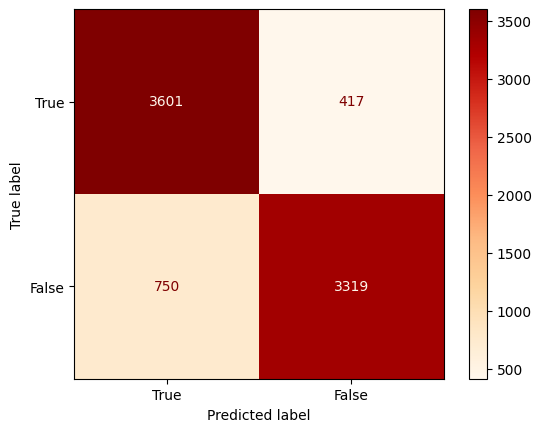

In [23]:
print('Accuracy of the model: ',str(np.round(accuracy_score(y_test,rfc)*100,2)) + '%')
listt = metrics.confusion_matrix(y_test,rfc)
accuracy_rfc = (np.round(accuracy_score(y_test,rfc)*100,2))
TP = listt[0][0]
FP = listt[0][1]
FN = listt[1][0]
TN = listt[1][1]
precision_rfc = (TP/(FP+TP))
print("Precision",np.round(precision_rfc,4))
recall_rfc = (TP/(FN+TP))
print("Recall",np.round(recall_rfc,4))
F1Score_rfc = (2*precision_rfc*recall_rfc)/(precision_rfc + recall_rfc)
print("F1 Score : ",np.round(F1Score_rfc,4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = listt, display_labels = [True,False])
cm_display.plot(cmap="OrRd")
plt.show()
# Random Forest Classifier - 85.25% 85.12% 85.43% 85.15% (85.59%,0.8614)
# Logistic Regression - (87.89%,0.8757)
# SVC - (89.49%,0.892)

LOGISTIC REGGRESSION

In [12]:
pipe = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',LogisticRegression())
])

In [13]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression())])

In [14]:
logRg = pipe.predict(x_test)
print(logRg)

['Fake' 'Fake' 'Real' ... 'Fake' 'Real' 'Real']


In [15]:
test = pd.Series(["Got the 256GB version at 21k and it is really worth the price. Camera can be slightly better but battery backup and other features are really good and worthy for the price paid.","I ordered F 19 pro two times one delivered in May and another in Aug. Only after receiving the second F19 Pro , I realized that first phone packet did not have the the earbuds headphone. I request that I be supplied the earbuds deficient in the first order. Also while confirming the dispatch, pls mention list of supplied items.","Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty","The Oppo F19 Pro+ 5G is a solid mid-range offering that delivers impressive performance and an attractive design"])
#check = input("Enter the Text")
#checkk = pd.Series([check])
pred = pipe.predict(test)
for x in pred:
    print(x)

Real
Real
Fake
Real


Accuracy of the model:  88.25%
Precision 0.8601
Recall 0.8991
F1 Score :  0.8792


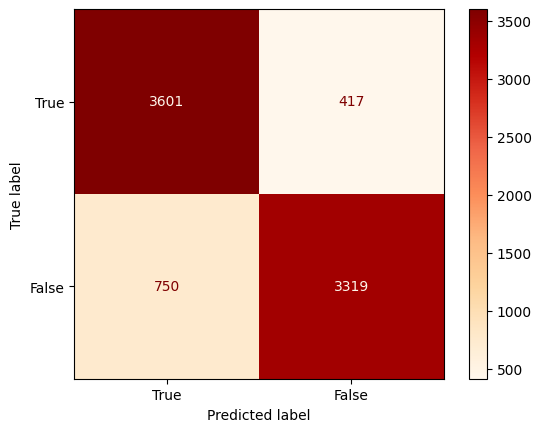

In [17]:
print('Accuracy of the model: ',str(np.round(accuracy_score(y_test,logRg)*100,2)) + '%')
accuracy_lR = (np.round(accuracy_score(y_test,logRg)*100,2))
listlR = metrics.confusion_matrix(y_test,logRg)
#print(listt)
TP = listlR[0][0]
FP = listlR[0][1]
FN = listlR[1][0]
TN = listlR[1][1]
precision_lR = (TP/(FP+TP))
print("Precision",np.round(precision_lR,4))
recall_lR = (TP/(FN+TP))
print("Recall",np.round(recall_lR,4))
F1Score_lR = 2*precision_lR*recall_lR/(precision_lR + recall_lR)
print("F1 Score : ",np.round(F1Score_lR,4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = listt, display_labels = [True,False])
cm_display.plot(cmap="OrRd")
plt.show()
# (88.25,0.8792)

In [18]:
print(accuracy_lR)

88.25


SUPPORT VECTOR MACHINE

In [19]:
pipel = Pipeline([
    ('bow',CountVectorizer()),
    ('tfidf',TfidfTransformer()),
    ('classifier',SVC())
])

In [20]:
pipel.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', SVC())])

In [79]:
svc = pipel.predict(x_test)
print(svc)

['Fake' 'Fake' 'Real' ... 'Fake' 'Real' 'Real']


In [80]:
test = pd.Series(["Got the 256GB version at 21k and it is really worth the price. Camera can be slightly better but battery backup and other features are really good and worthy for the price paid.","I ordered F 19 pro two times one delivered in May and another in Aug. Only after receiving the second F19 Pro , I realized that first phone packet did not have the the earbuds headphone. I request that I be supplied the earbuds deficient in the first order. Also while confirming the dispatch, pls mention list of supplied items.","Love this!  Well made, sturdy, and very comfortable.  I love it!Very pretty","The Oppo F19 Pro+ 5G is a solid mid-range offering that delivers impressive performance and an attractive design"])
'''userinput = input("Enter the Text")
words = userinpu.lower().split()
filtered_words = [word for word in words if word not in stopwords.words('english')]
userinput = " ".join(filtered_words)
userinput = pd.Series([userinput])'''
pred = pipe.predict(test)
for x in pred:
    print(x)

Real
Real
Fake
Real


Accuracy of the model:  89.61%
Precision 0.8698
Recall 0.9168
F1 Score :  0.8927


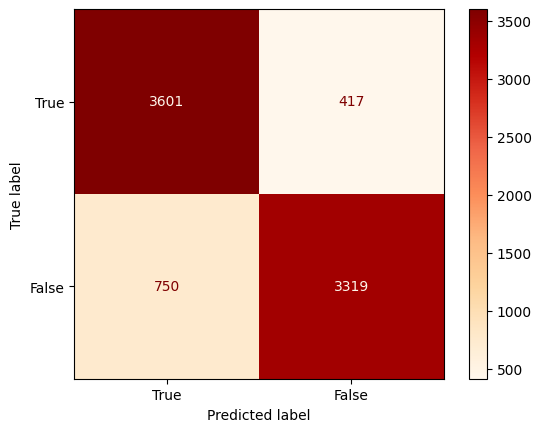

In [81]:
print('Accuracy of the model: ',str(np.round(accuracy_score(y_test,svc)*100,2)) + '%')
accuracy_svc = (np.round(accuracy_score(y_test,svc)*100,2))
listSvc = metrics.confusion_matrix(y_test,svc)
#print(listt)
TP = listSvc[0][0]
FP = listSvc[0][1]
FN = listSvc[1][0]
TN = listSvc[1][1]
precision_svc = (TP/(FP+TP))
print("Precision",np.round(precision_svc,4))
recall_svc = (TP/(FN+TP))
print("Recall",np.round(recall_svc,4))
F1Score_svc = 2*precision_svc*recall_svc/(precision_svc + recall_svc)
print("F1 Score : ",np.round(F1Score_svc,4))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = listt, display_labels = [True,False])
cm_display.plot(cmap="OrRd")
plt.show()
# (89.61,0.8972)

Predicting how many real and fake reviews are there in Amazon Best Seller products

In [51]:
amazon = pd.read_csv("scrapingReview.csv")
amazon = amazon.dropna(subset=["Description"])  
testob = amazon["Description"]
chek = pipel.predict(testob)
print(chek)
amazon["Targt"] = chek

['Real' 'Real' 'Real' ... 'Real' 'Real' 'Fake']


In [52]:
real = amazon[amazon["Targt"] == "Real"].count()
print("Real Reviews : ",real[0])
fake = amazon[amazon["Targt"] == "Fake"].count()
print("Fake Reviews : ",fake[0])

Real Reviews :  1728
Fake Reviews :  487


PLOTTING Grouped Bar Chart of Accuracies and F1 Scores

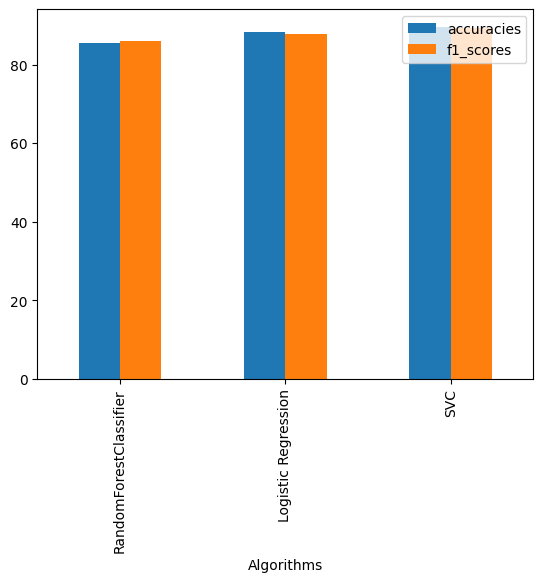

In [85]:
dataa = {
    "Algorithms" : ["RandomForestClassifier", "Logistic Regression", "SVC"],
    "accuracies" : [accuracy_rfc, accuracy_lR, accuracy_svc],
    "f1_scores" : [(F1Score_rfc*100), (F1Score_lR*100), (F1Score_svc*100)]
}
dff = pd.DataFrame(dataa)
fig, ax = plt.subplots()
# Use pandas plotting with 'bar' kind
dff.plot(x="Algorithms", kind="bar", stacked=False, ax=ax)
# Add labels and title
plt.show()

PLOTTING Bar Charts of Accuracies and F1 Scores Seperately

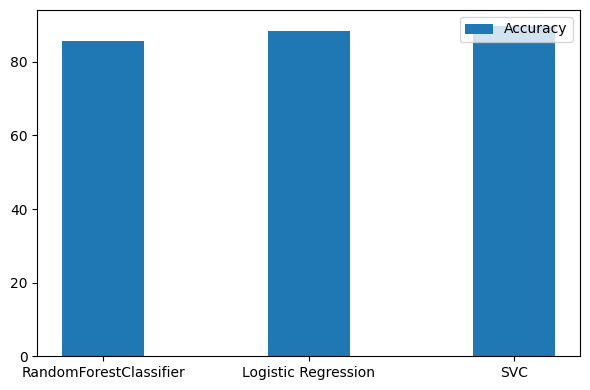

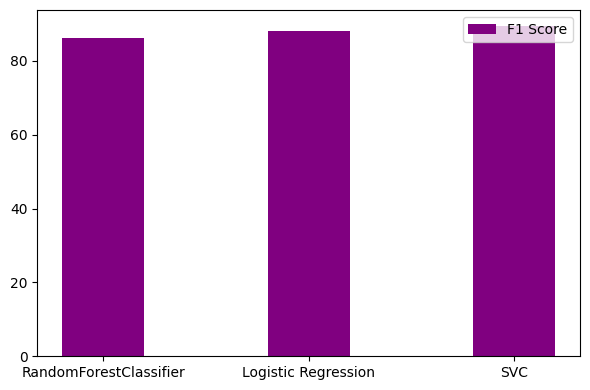

In [87]:
accuracies = [accuracy_rfc, accuracy_lR, accuracy_svc]
f1_scores = [(F1Score_rfc*100), (F1Score_lR*100), (F1Score_svc*100)]
Algorithms = ["RandomForestClassifier", "Logistic Regression", "SVC"]
plt.figure(figsize=(6,4))
plt.bar(Algorithms, accuracies, label="Accuracy", width=0.4)
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(6,4))
plt.bar(Algorithms, f1_scores, label="F1 Score", width=0.4 , color="purple")  
plt.legend()
plt.tight_layout()
plt.show()